# Figure 2
Need:
1. 

In [15]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec

In [16]:
phase_color = {"pre": "#1f77b4", "post": "#ff7f0e", "gray": "#888888", "catch": "#FFE6CC"}
ROICOLORS = {
    "EVC": "#00FF00",
    "HLVC": "#FF0000",
    "LOC": "#FF0033",
    "FC": "#FF3300",
    "Dorsal": "#0000FF",
    "FPN": "#FF00FF",
    "DMN": "#00FFFF",
    "Limbic": "#862D2D",
    "other": "#000000",
}
order = ["EVC", "LOC", "FC", "Dorsal", "FPN", "DMN"]

### A

In [27]:
path = "/Users/chris/projects/Nature2023MooneyScripts/results/roi_based_encoding_similarity/counterfactual-post/performance_detailed.csv"
df = pd.read_csv(path)

cute_names_loc = ["LO1", "LO2"]
cute_names_FC = ["FG_L", "FG_R"]

cute_names_early_visual = ["v1", "v2", "v3", "hv4"]
cute_names_dmn = ["DMN_MPFC", "DMN_PCC", "DMN_PL", "DMN_PR"]
cute_names_fpn = ["FPN_FL", "FPN_FR", "FPN_PL", "FPN_PR"]
cute_names_dorsal = ['IPS0', 'IPS1', 'IPS2', 'IPS3', 'IPS4', 'IPS5', 'SPL']

# Add left and right
all_cute_names = cute_names_early_visual + cute_names_FC + cute_names_loc + cute_names_dmn + cute_names_fpn + cute_names_dorsal

df["ROI group"] = ""
# Add description of large ROI
for row in range(len(df)):
    roi = df.loc[row, "roi_name"]

    if roi in cute_names_early_visual:
        df.loc[row, "ROI group"] = "EVC"
    elif roi in cute_names_FC:
        df.loc[row, "ROI group"] = "FC"
    elif roi in cute_names_loc:
        df.loc[row, "ROI group"] = "LOC"
    elif roi in cute_names_dmn:
        df.loc[row, "ROI group"] = "DMN"
    elif roi in cute_names_fpn:
        df.loc[row, "ROI group"] = "FPN"
    elif roi in cute_names_dorsal:
        df.loc[row, "ROI group"] = "Dorsal"

selected_df = df[df['roi_name'].isin(all_cute_names)]

def plot_roi_ranking(selected_df, ax):
    selected_df = selected_df.copy()

    # Sort the rows by ROI name's appearance in all_cute_names
    selected_df['roi_name'] = pd.Categorical(selected_df['roi_name'], categories=all_cute_names, ordered=True)
    selected_df = selected_df.sort_values('roi_name')

    sns.barplot(data=selected_df[selected_df["score_type"] == "Encoding score"], y="percentage_significant", x="ROI group", ax=ax)

    ax.set_ylabel("% voxels with learning-related info.")

### B

In [28]:
def plot_param_df(param_df, ax, x_label, y_label):
    # Calculate the error bars as the difference from the estimate
    param_df['err_lower'] = param_df['coef'] - param_df['ci_low']
    param_df['err_upper'] = param_df['ci_high'] - param_df['coef']

    ax.bar(param_df.index, param_df["coef"], yerr=[param_df["err_lower"], param_df["err_upper"]], capsize=5, color=[ROICOLORS[roi] for roi in param_df["ROI"]], alpha=0.5)
    ax.set_xticks(param_df.index, param_df["ROI"])

    # Draw star
    for idx, row in param_df.iterrows():
        if row["q"] < 0.05:
            if row["coef"] > 0:
                ax.text(idx + 0.2, row["coef"] + 0.01, "*", ha='center', va='center', color="black", fontsize=20)
            else:
                ax.text(idx + 0.2, row["coef"] - 0.5, "*", ha='center', va='center', color="black", fontsize=20)

    ax.axhline(0, color='black', linewidth=0.5)

    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)

In [29]:
df_b = pd.DataFrame({'ROI': {0: 'EVC', 1: 'FC', 2: 'LOC', 3: 'DMN', 4: 'FPN', 5: 'Dorsal'},
 'coef': {0: -0.7768683794885921,
  1: -0.06602996743912762,
  2: 0.7979230793937735,
  3: 0.657090054876273,
  4: 0.6529151242342494,
  5: -2.05089453553969},
 'ci_low': {0: -1.7950065419592796,
  1: -1.494453156567454,
  2: -0.47907567377298244,
  3: -0.44764079275495594,
  4: -0.4335513209864509,
  5: -3.314510279439032},
 'ci_high': {0: 0.24126978298209523,
  1: 1.3623932216891987,
  2: 2.0749218325605296,
  3: 1.761820902507502,
  4: 1.7393815694549497,
  5: -0.7872787916403476},
 'p': {0: 0.134781842560865,
  1: 0.9278097548482808,
  2: 0.22070004372659413,
  3: 0.24370350991886314,
  4: 0.23885801657770522,
  5: 0.0014672042984605839},
 'q': {0: 0.29244421190263575,
  1: 0.9278097548482808,
  2: 0.29244421190263575,
  3: 0.29244421190263575,
  4: 0.29244421190263575,
  5: 0.008803225790763503},
 'err_lower': {0: 1.0181381624706876,
  1: 1.4284231891283263,
  2: 1.276998753166756,
  3: 1.104730847631229,
  4: 1.0864664452207002,
  5: 1.2636157438993423},
 'err_upper': {0: 1.0181381624706873,
  1: 1.4284231891283263,
  2: 1.2769987531667562,
  3: 1.104730847631229,
  4: 1.0864664452207005,
  5: 1.2636157438993423}})

### C

In [30]:
df_c = pd.DataFrame({'ROI': {0: 'EVC', 1: 'FC', 2: 'LOC', 3: 'DMN', 4: 'FPN', 5: 'Dorsal'},
 'coef': {0: -0.15876067702970875,
  1: 0.24199840786272356,
  2: -0.0613517285185491,
  3: -0.08684301466961578,
  4: 0.03815169258878804,
  5: 0.017547929619866554},
 'ci_low': {0: -0.3824581450522443,
  1: 0.06669789783697827,
  2: -0.20960783005561584,
  3: -0.22072941180246763,
  4: -0.14143951023251236,
  5: -0.11722056169262997},
 'ci_high': {0: 0.06493679099282676,
  1: 0.41729891788846885,
  2: 0.08690437301851765,
  3: 0.04704338246323608,
  4: 0.21774289541008843,
  5: 0.15231642093236308},
 'p': {0: 0.16422267342518648,
  1: 0.006816343126650533,
  2: 0.41732120443681897,
  3: 0.20362352438448972,
  4: 0.677141093085435,
  5: 0.7985663899250772},
 'q': {0: 0.40724704876897944,
  1: 0.0408980587599032,
  2: 0.6259818066552285,
  3: 0.40724704876897944,
  4: 0.7985663899250772,
  5: 0.7985663899250772},
 'err_lower': {0: 0.22369746802253554,
  1: 0.1753005100257453,
  2: 0.14825610153706675,
  3: 0.13388639713285186,
  4: 0.1795912028213004,
  5: 0.13476849131249652},
 'err_upper': {0: 0.2236974680225355,
  1: 0.1753005100257453,
  2: 0.14825610153706675,
  3: 0.13388639713285186,
  4: 0.1795912028213004,
  5: 0.13476849131249652}})

### D

In [31]:
df_d = pd.DataFrame(
{'Connection': {0: 'DMN-FC',
  1: 'DMN-LOC',
  2: 'Dorsal-DMN',
  3: 'Dorsal-EVC',
  4: 'Dorsal-FC',
  5: 'Dorsal-FPN',
  6: 'Dorsal-LOC',
  7: 'FC-EVC',
  8: 'FPN-DMN',
  9: 'FPN-EVC',
  10: 'FPN-FC',
  11: 'FPN-LOC',
  12: 'LOC-EVC',
  13: 'LOC-FC'},
 'coef': {0: 0.1292268354013991,
  1: 0.07066980224749357,
  2: 0.07500617288468757,
  3: 0.18117887008767974,
  4: 0.20783952957560586,
  5: 0.23993906815750743,
  6: 0.2743952399171876,
  7: 0.24332674467863896,
  8: 0.3161434529020064,
  9: 0.06158290541669848,
  10: 0.35181079081121724,
  11: 0.12012604434462594,
  12: 0.3176565077198187,
  13: 0.3251694239092465},
 'ci_low': {0: -0.002695337335729603,
  1: -0.09547673657774276,
  2: -0.08487915769326022,
  3: 0.037674115361833765,
  4: 0.016757416551640814,
  5: 0.09617386331304245,
  6: 0.11776162860010173,
  7: 0.1065906329107178,
  8: 0.1474878137730391,
  9: -0.06973905403010028,
  10: 0.17950761593707054,
  11: -0.05601225615266596,
  12: 0.18124592105567822,
  13: 0.13759939802853924},
 'ci_high': {0: 0.2611490081385278,
  1: 0.23681634107272992,
  2: 0.23489150346263538,
  3: 0.32468362481352575,
  4: 0.3989216425995709,
  5: 0.3837042730019724,
  6: 0.4310288512342735,
  7: 0.3800628564465601,
  8: 0.4847990920309737,
  9: 0.19290486486349723,
  10: 0.524113965685364,
  11: 0.2962643448419178,
  12: 0.45406709438395915,
  13: 0.5127394497899538},
 'p': {0: 0.05486807672893334,
  1: 0.404470760207958,
  2: 0.35785099174674706,
  3: 0.013341880057693179,
  4: 0.03301935622047391,
  5: 0.0010712588297724136,
  6: 0.0005957961335568545,
  7: 0.0004869663339431347,
  8: 0.0002388439255751523,
  9: 0.3580342536806358,
  10: 6.284140104341217e-05,
  11: 0.1813230768955807,
  12: 5.015758249995404e-06,
  13: 0.0006793677915646071},
 'q': {0: 0.07681530742050667,
  1: 0.404470760207958,
  2: 0.38557535011760774,
  3: 0.02334829010096306,
  4: 0.05136344300962608,
  5: 0.002142517659544827,
  6: 0.00158519151365075,
  7: 0.00158519151365075,
  8: 0.0011146049860173775,
  9: 0.38557535011760774,
  10: 0.0004398898073038852,
  11: 0.23077482513982997,
  12: 7.022061549993566e-05,
  13: 0.00158519151365075}}
)

In [32]:
rows_survived = df_d[df_d["q"] < 0.05]
rows_survived

,Connection,coef,ci_low,ci_high,p,q
3,Dorsal-EVC,0.181179,0.037674,0.324684,0.013342,0.023348
5,Dorsal-FPN,0.239939,0.096174,0.383704,0.001071,0.002143
6,Dorsal-LOC,0.274395,0.117762,0.431029,0.000596,0.001585
7,FC-EVC,0.243327,0.106591,0.380063,0.000487,0.001585
8,FPN-DMN,0.316143,0.147488,0.484799,0.000239,0.001115
10,FPN-FC,0.351811,0.179508,0.524114,0.000063,0.000440
12,LOC-EVC,0.317657,0.181246,0.454067,0.000005,0.000070
13,LOC-FC,0.325169,0.137599,0.512739,0.000679,0.001585


In [33]:
import networkx as nx
G = nx.Graph()

In [34]:
for idx, row in rows_survived.iterrows():
    connection_from, connection_to = row["Connection"].split("-")
    G.add_edge(connection_from, connection_to, weight=row["coef"])

In [37]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

def plot_graph(G, ax, k):
    pos = {
        "DMN": [1, 0],
        "FPN": [1, 0.5],
        "FC": [0.5, 0.5],
        "LOC": [0, 0.5],
        "Dorsal": [0.5, 0],
        "EVC": [0, 0],
    }
    nx.draw_networkx_nodes(G, pos, node_size=700)

    # Color mapping and normalization setup
    red_cmap = cm.Reds

    # Draw nodes
    weights = [edge[2]['weight'] for edge in G.edges(data=True)]
    max_weight = max(weights)
    min_weight = 0

    norm1 = mcolors.Normalize(vmin=min_weight, vmax=max_weight, clip=True)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=700, ax=ax)

    # Draw edges with style and color
    for edge in G.edges(data=True):
        style='arc3'
        line_style = 'solid'
        color = red_cmap(norm1(edge[2]['weight']))
        nx.draw_networkx_edges(G, pos, edgelist=[(edge[0], edge[1])], width=2, ax=ax,
                            edge_color=color, connectionstyle=style, style=line_style)
    
    # Add colorbar
    sm1 = plt.cm.ScalarMappable(cmap=red_cmap, norm=norm1)
    sm1.set_array([])
    cbar1 = plt.colorbar(sm1, ax=ax, fraction=0.036, pad=0.04)
    cbar1.set_label("Spearman's rho")

    nx.draw_networkx_labels(G, pos, ax=ax)
    ax.axis("off")

### Put it together
ROI order: EVC, LOC, FC, Dorsal, FPN, DMN
Size: 90mm single, 180mm double, 170mm depth max
Font: Arial

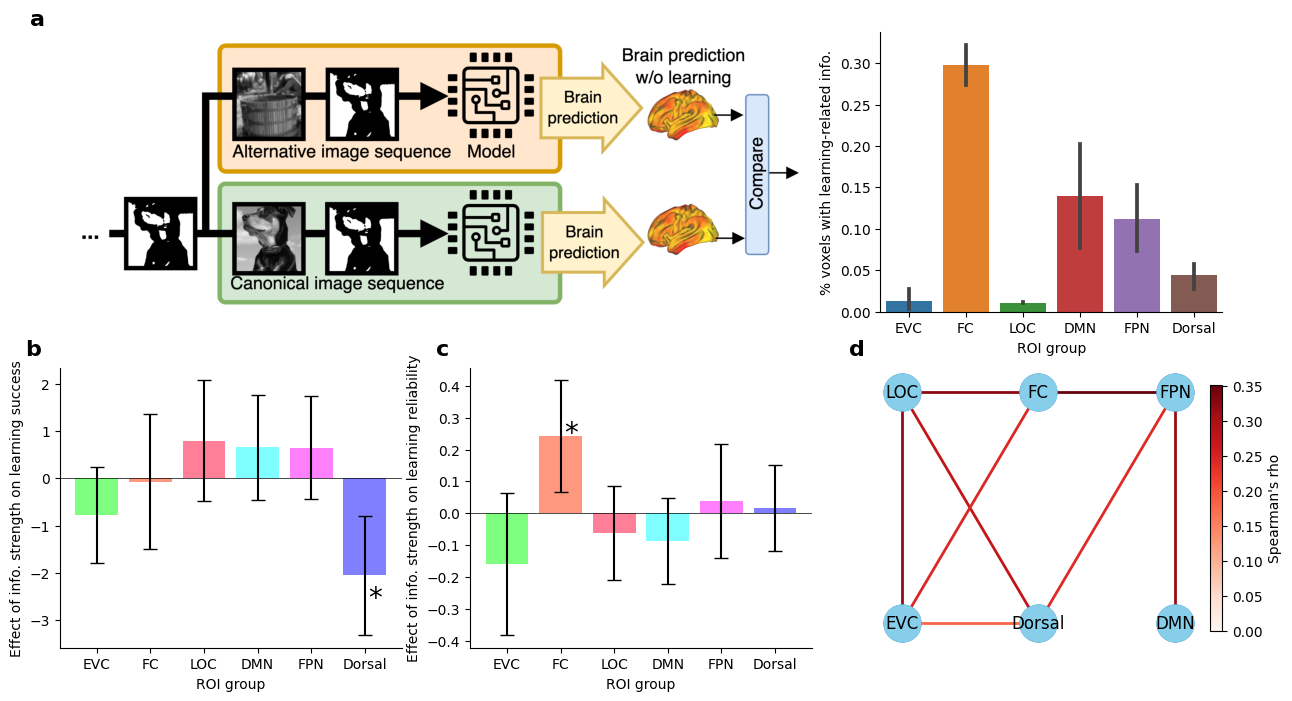

In [38]:
fig = plt.figure(figsize=(15, 8))

gs = GridSpec(2, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, :2])

ax1.text(-0.04, 1.1, "a", transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top')

# Add png
ax1.imshow(plt.imread("/Users/chris/projects/Nature2023MooneyScripts/data/ModelComparison.png"))

# No spines or ticks
ax1.spines[['top', 'bottom', 'right', 'left']].set_visible(False)
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = fig.add_subplot(gs[0, 2])
ax2.spines[['top', 'right']].set_visible(False)
plot_roi_ranking(selected_df, ax2)

ax3 = fig.add_subplot(gs[1, 0])
ax3.spines[['top', 'right']].set_visible(False)

# Mark B
ax3.text(-0.1, 1.1, "b", transform=ax3.transAxes, fontsize=16, fontweight='bold', va='top')
plot_param_df(df_b, ax3, "ROI group", "Effect of info. strength on learning success")

ax4 = fig.add_subplot(gs[1, 1])
ax4.spines[['top', 'right']].set_visible(False)

# Mark C
ax4.text(-0.1, 1.1, "c", transform=ax4.transAxes, fontsize=16, fontweight='bold', va='top')
plot_param_df(df_c, ax4, "ROI group", "Effect of info. strength on learning reliability")

# Mark D
ax5 = fig.add_subplot(gs[1, 2])
ax5.spines[['top', 'right']].set_visible(False)
ax5.text(-0.1, 1.1, "d", transform=ax5.transAxes, fontsize=16, fontweight='bold', va='top')
plot_graph(G, ax5, 2.5)

plt.savefig("/Users/chris/Desktop/figure2.pdf", dpi=1000, bbox_inches='tight')